In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("../data/raw/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [52]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Exploratory Data Analysis (EDA)

Visualizing the data to understand patterns and relationships.

### Target Variable Distribution

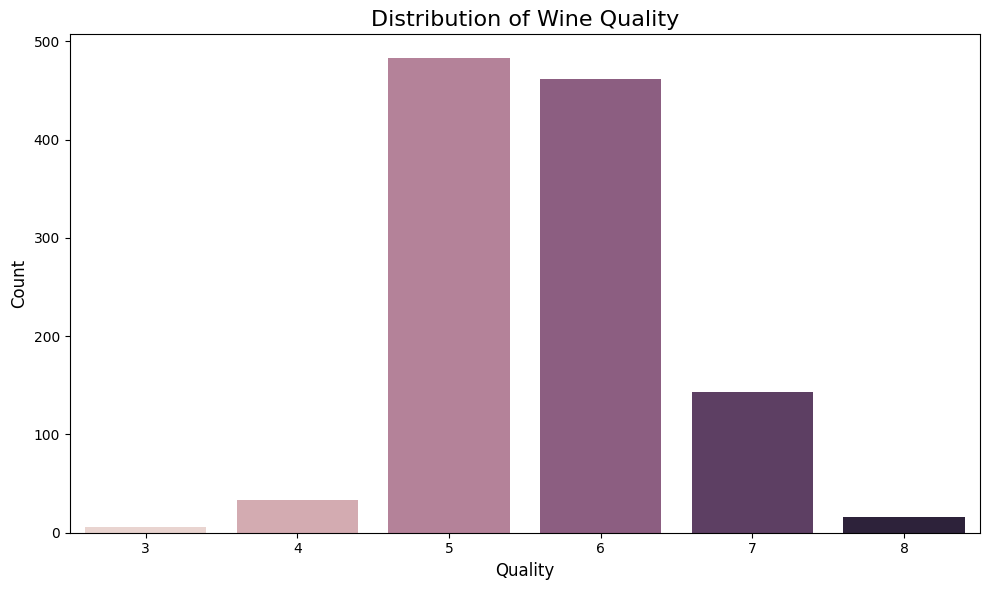

In [53]:
# Countplot for quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', hue='quality', legend=False)
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Histograms with KDE

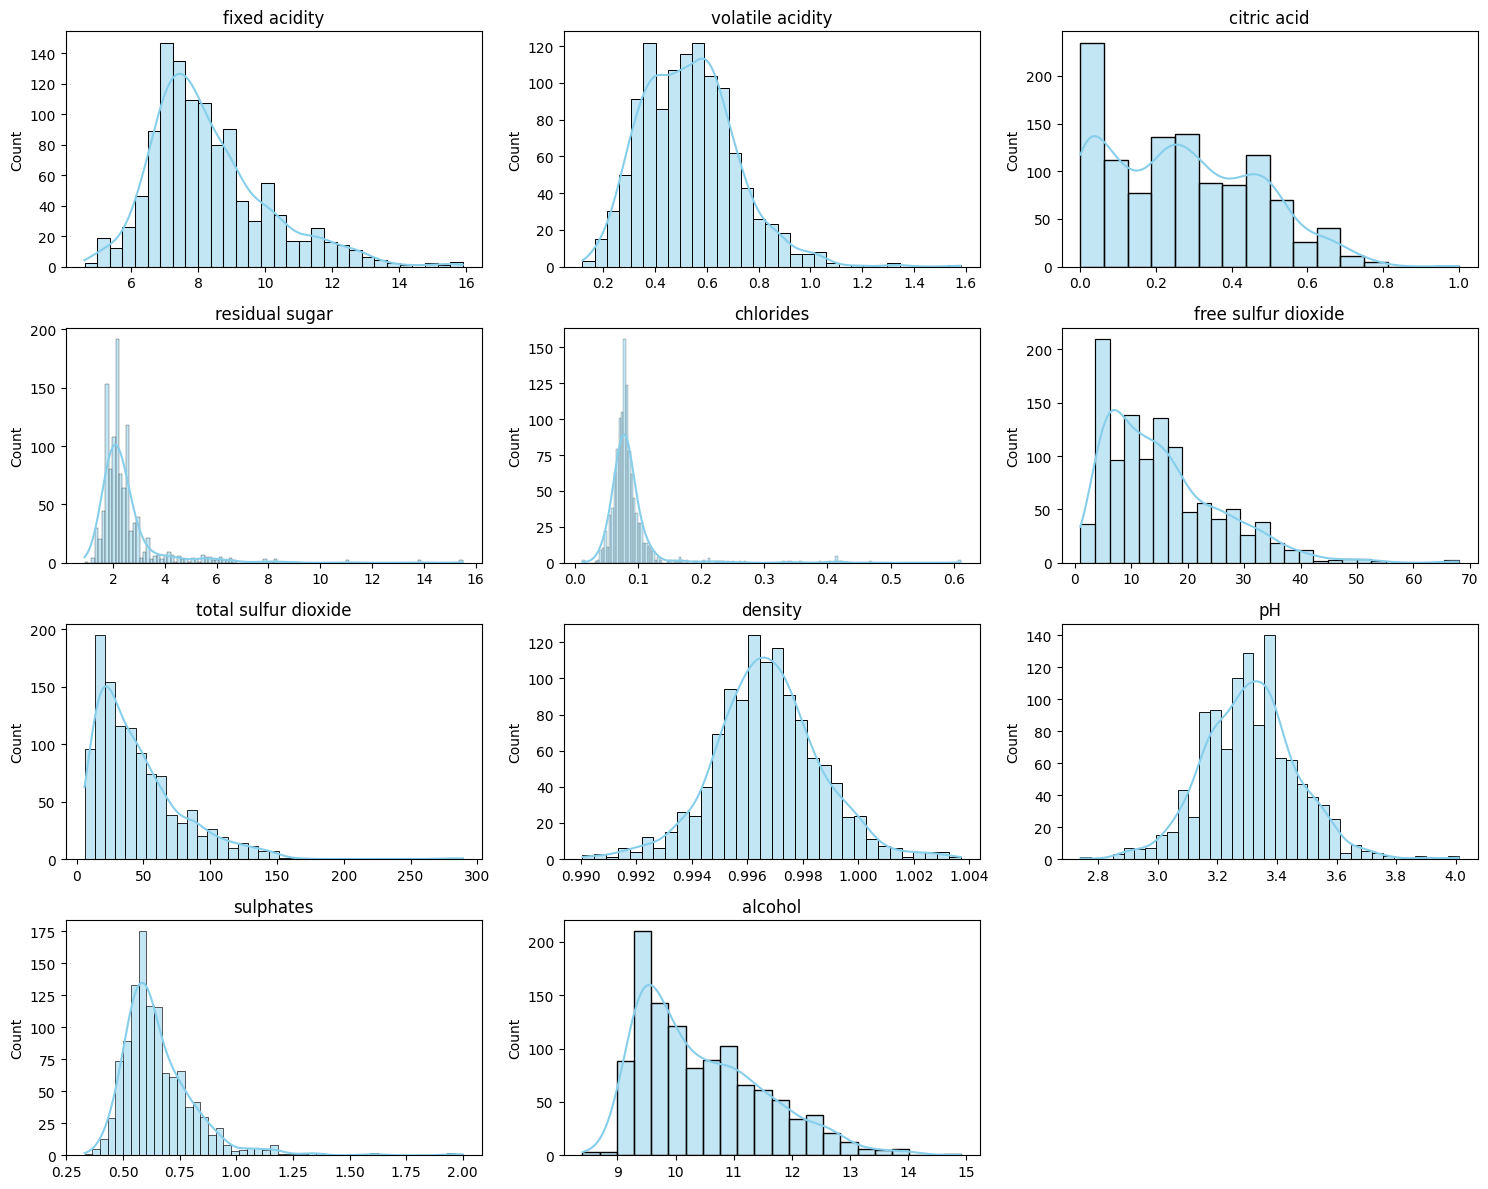

In [54]:
# Get numerical features (excluding Id and quality)
numerical_features = df.drop(['Id', 'quality'], axis=1).select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['Id', 'quality']]

# Create histograms with KDE for all numerical features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_xlabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Box Plots for Features

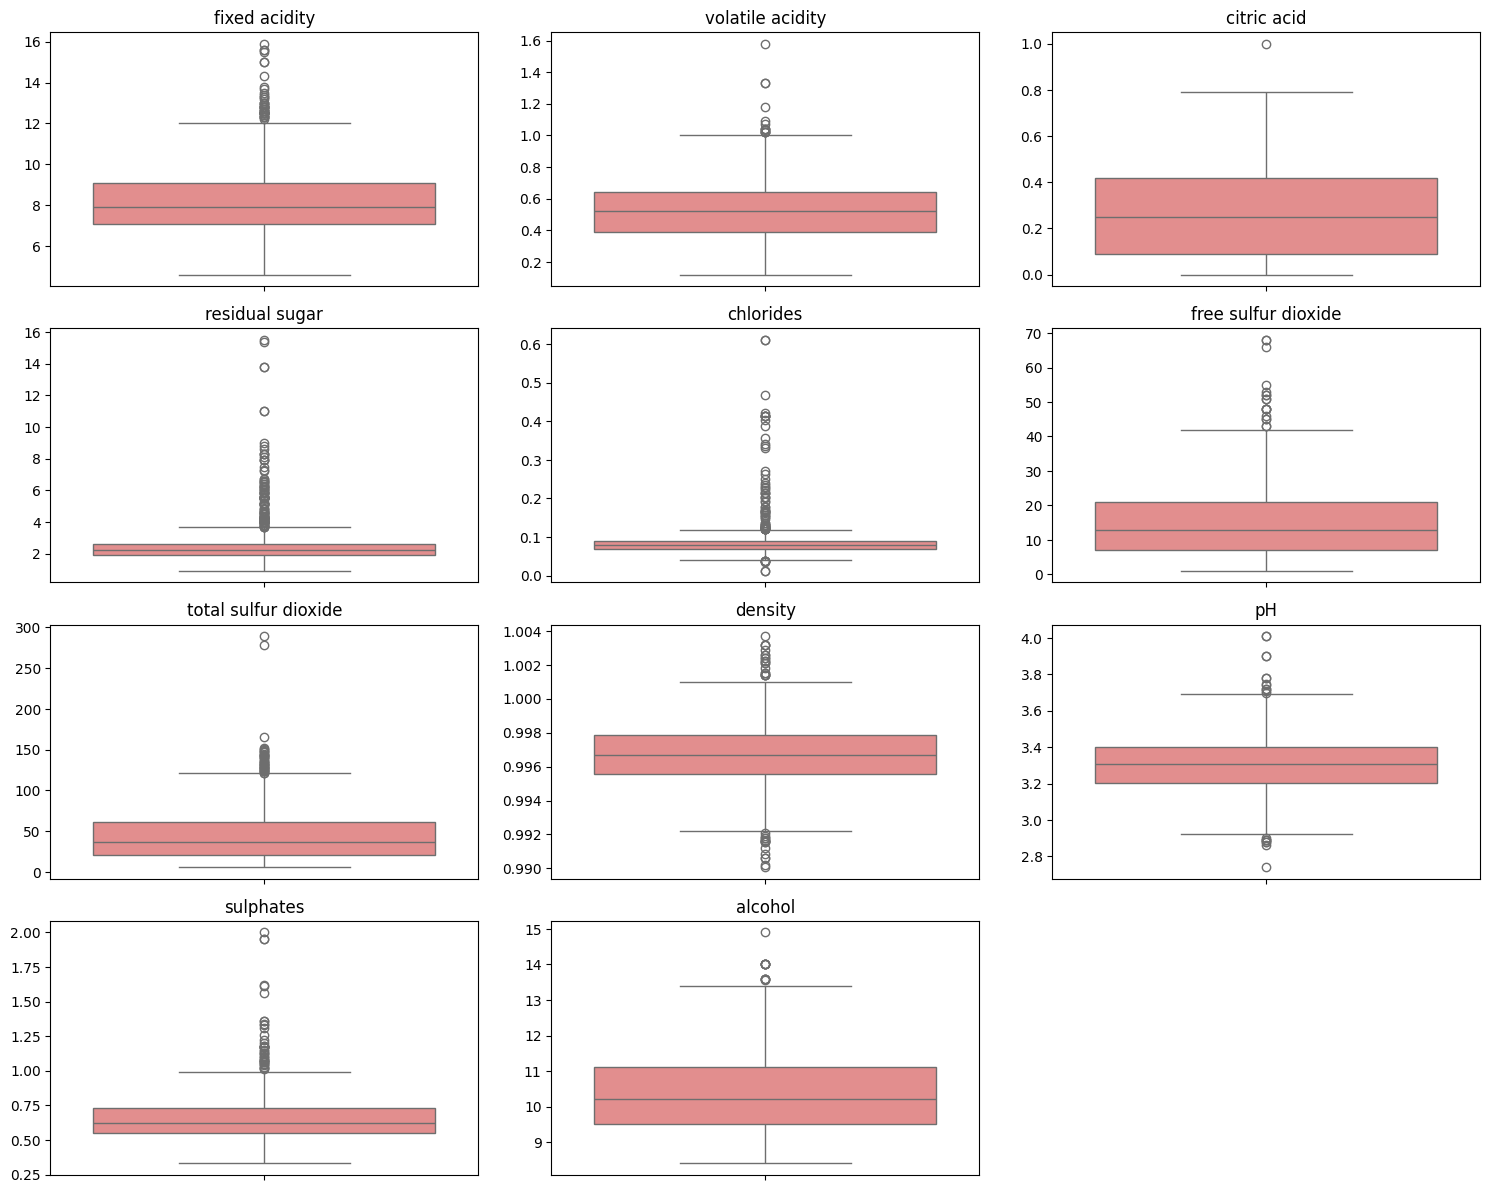

In [55]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_ylabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Outlier Removal using IQR Method

In [58]:
# Remove outliers using IQR method
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers using the IQR method
    multiplier: typically 1.5 for outliers, 3.0 for extreme outliers
    """
    df_clean = df.copy()
    initial_rows = len(df_clean)
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Count outliers
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers (lower={lower_bound:.3f}, upper={upper_bound:.3f})")
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    final_rows = len(df_clean)
    print(f"\nRows before: {initial_rows}")
    print(f"Rows after: {final_rows}")
    print(f"Rows removed: {initial_rows - final_rows} ({100 * (initial_rows - final_rows) / initial_rows:.2f}%)")
    
    return df_clean

# Apply outlier removal
df_clean = remove_outliers_iqr(df, numerical_features, multiplier=3.0)

# Update df with cleaned data
df = df_clean.copy()
df.describe()

fixed acidity: 4 outliers (lower=1.100, upper=15.100)
volatile acidity: 1 outliers (lower=-0.350, upper=1.382)
citric acid: 0 outliers (lower=-0.900, upper=1.410)
residual sugar: 66 outliers (lower=-0.200, upper=4.700)
chlorides: 39 outliers (lower=0.010, upper=0.150)
free sulfur dioxide: 0 outliers (lower=-35.000, upper=63.000)
total sulfur dioxide: 0 outliers (lower=-89.000, upper=170.000)
density: 0 outliers (lower=0.989, upper=1.004)
pH: 0 outliers (lower=2.610, upper=4.010)
sulphates: 8 outliers (lower=0.070, upper=1.190)
alcohol: 0 outliers (lower=4.400, upper=16.300)

Rows before: 1143
Rows after: 1025
Rows removed: 118 (10.32%)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,8.254829,0.529590,0.254888,2.263805,0.079011,15.404390,44.416098,0.996582,3.320985,0.639522,10.452228,5.660488,814.702439
std,1.700821,0.177195,0.189877,0.588183,0.016451,9.633804,29.963157,0.001825,0.152820,0.130650,1.066345,0.790477,463.664722
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.080000,1.900000,0.070000,7.000000,21.000000,0.995500,3.220000,0.550000,9.500000,5.000000,422.000000
50%,7.900000,0.520000,0.240000,2.150000,0.078000,14.000000,36.000000,0.996560,3.320000,0.610000,10.200000,6.000000,811.000000
75%,9.100000,0.640000,0.400000,2.500000,0.087000,21.000000,59.000000,0.997700,3.410000,0.710000,11.200000,6.000000,1221.000000
max,15.000000,1.330000,0.760000,4.700000,0.147000,53.000000,165.000000,1.002100,4.010000,1.180000,14.000000,8.000000,1597.000000


### Box Plots after cleaning

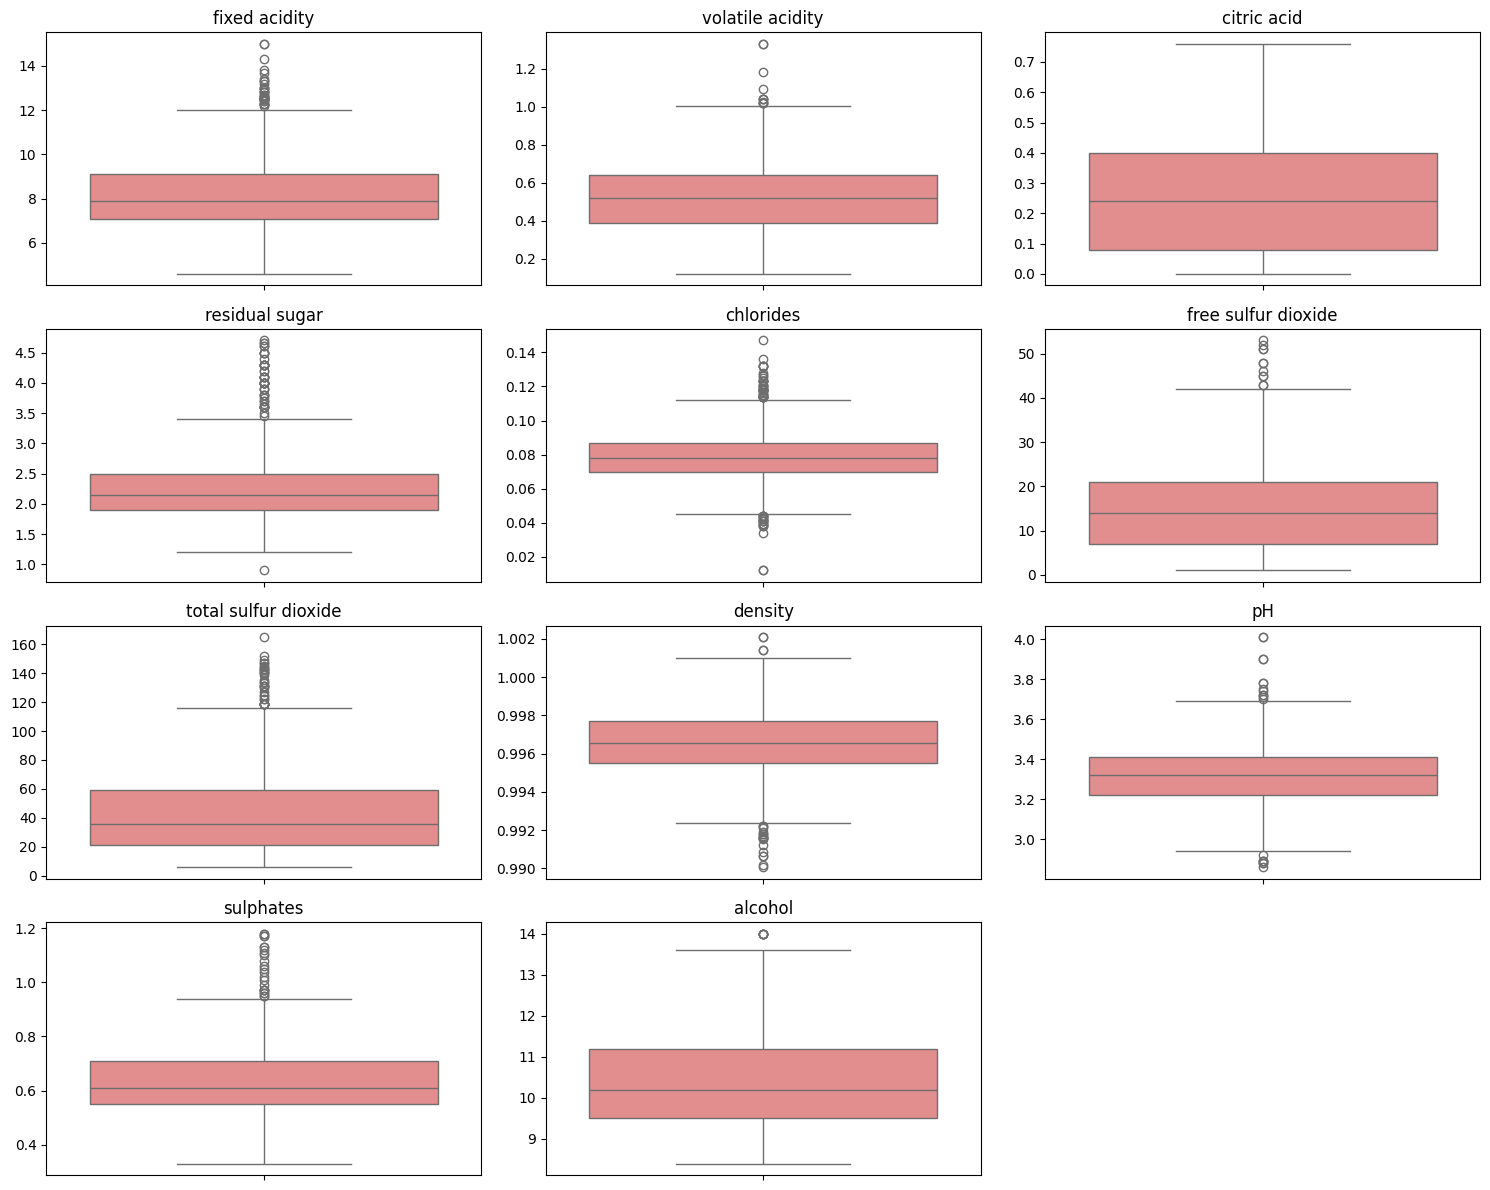

In [59]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_ylabel('')

# Remove extra subplots if any
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Correlation Heatmap

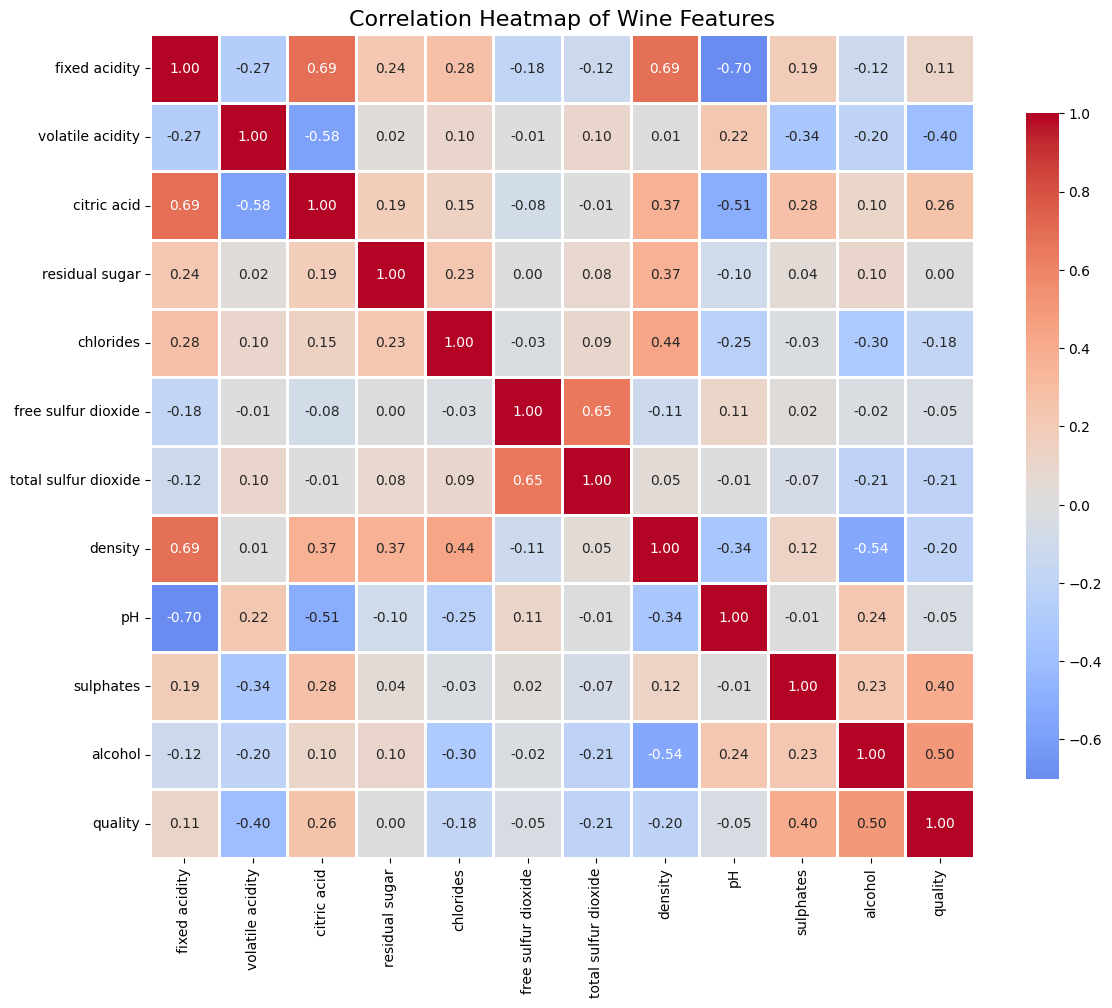

In [60]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + ['quality']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Wine Features', fontsize=16)
plt.tight_layout()
plt.show()

### Pair Plot of Top Features

Top 5 features correlated with quality:
alcohol                 0.496370
volatile acidity        0.399935
sulphates               0.396992
citric acid             0.257138
total sulfur dioxide    0.211379
Name: quality, dtype: float64


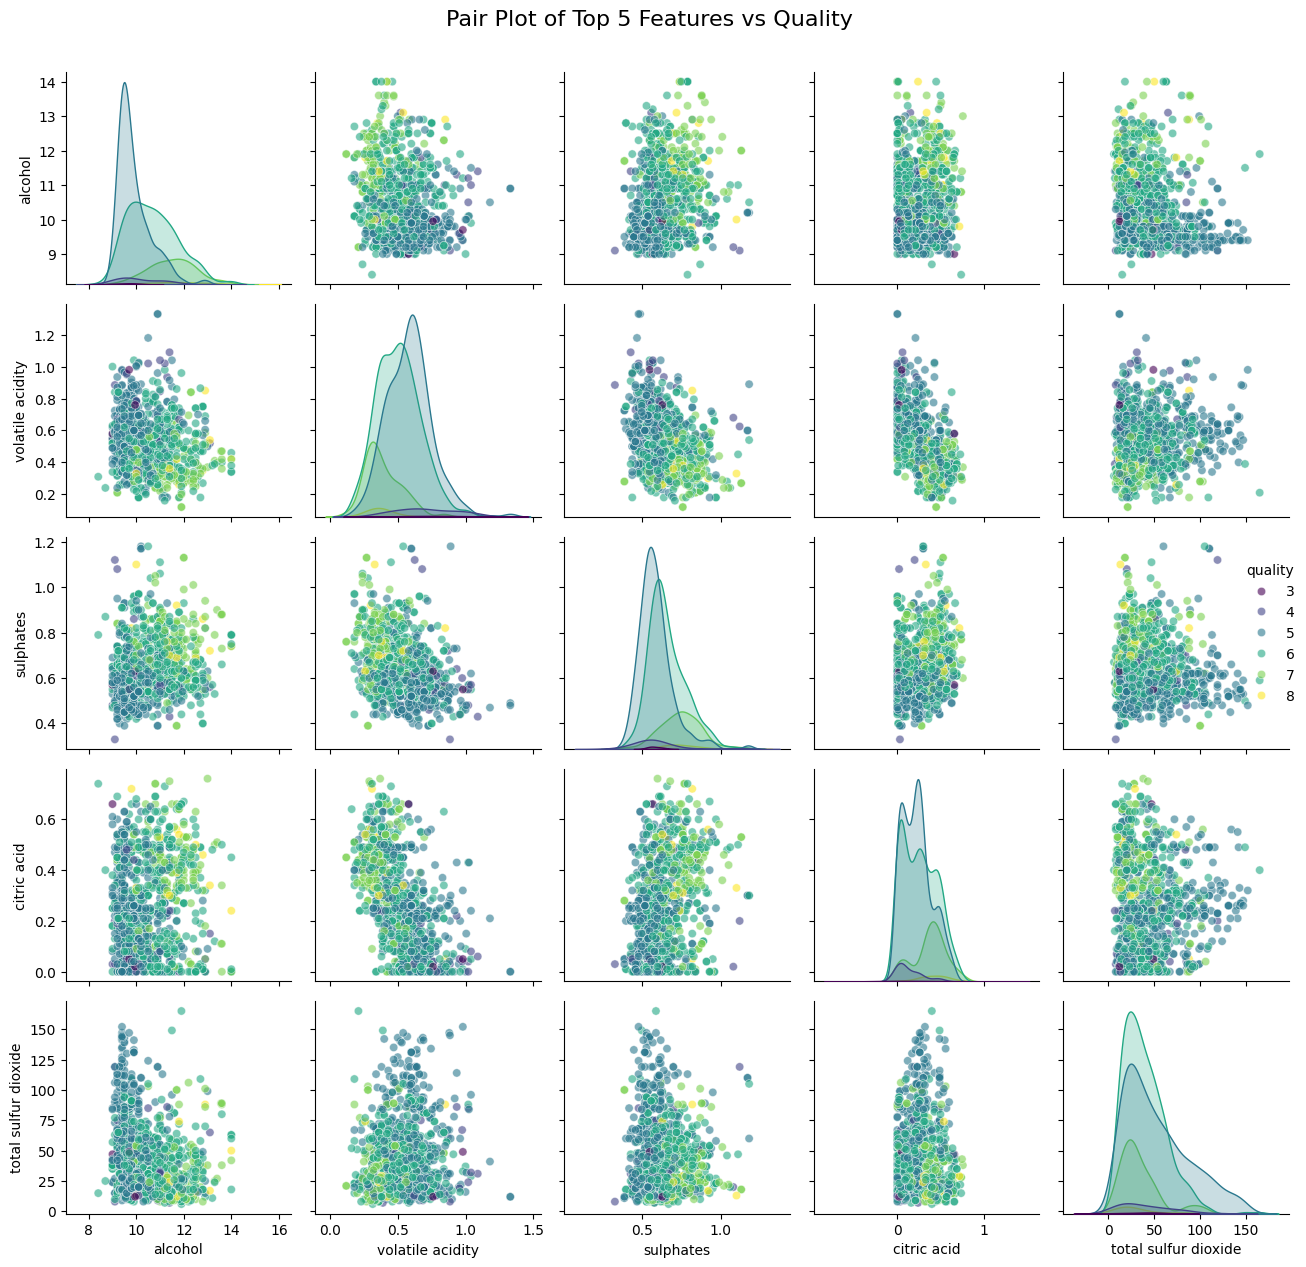

In [61]:
# Get top features most correlated with quality
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
top_features = quality_corr[1:6].index.tolist()  # Top 5 features excluding quality itself

print("Top 5 features correlated with quality:")
print(quality_corr[1:6])

# Pair plot for top features
sns.pairplot(df[top_features + ['quality']], hue='quality', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Top 5 Features vs Quality', y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

## Data Imputation

Handling missing values in the dataset.

In [62]:
# Check for missing values again
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Example imputation strategies (if needed):
# 1. For numerical features: use mean, median, or forward/backward fill
# 2. For categorical features: use mode or a constant value

# Example code (commented out since we have no missing values):
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Total missing values: 0


## Target Encoding

Encoding the 'quality' column for modeling.

In [63]:
from sklearn.preprocessing import LabelEncoder

# Check unique values in quality column
print("Unique quality values:", sorted(df['quality'].unique()))
print("Value counts:")
print(df['quality'].value_counts().sort_index())

# Encode quality column (convert to 0-based indexing if needed)

le = LabelEncoder()
df['quality_encoded'] = le.fit_transform(df['quality'])


Unique quality values: [3, 4, 5, 6, 7, 8]
Value counts:
3      3
4     30
5    431
6    423
7    124
8     14
Name: quality, dtype: int64


In [64]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,2


## Feature Scaling and Normalization

Scaling numerical features to ensure they are on a similar scale for modeling.

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = [col for col in df.columns if col not in ['Id', 'quality', 'quality_encoded']]

print(f"Features to scale: {features_to_scale}")
print("\nOriginal feature statistics:")
print(df[features_to_scale].describe())

# StandardScaler (Z-score normalization: mean=0, std=1)
scaler_standard = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# MinMaxScaler (scales to range [0, 1])
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

print("\n\nStandardScaler (Z-score) statistics:")
print(df_scaled_standard[features_to_scale].describe())

print("\n\nMinMaxScaler statistics:")
print(df_scaled_minmax[features_to_scale].describe())

# Keep the StandardScaler version as default
df_scaled = df_scaled_standard.copy()

Features to scale: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Original feature statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1025.000000       1025.000000  1025.000000     1025.000000   
mean        8.254829          0.529590     0.254888        2.263805   
std         1.700821          0.177195     0.189877        0.588183   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.080000        1.900000   
50%         7.900000          0.520000     0.240000        2.150000   
75%         9.100000          0.640000     0.400000        2.500000   
max        15.000000          1.330000     0.760000        4.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1025.000000          1025.000000           1025.000000

In [66]:

df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_encoded
0,-0.502843,0.962178,-1.343038,-0.618825,-0.183097,-0.457404,-0.347800,0.668050,1.237452,-0.608962,-0.987243,5,0,2
1,-0.267548,1.978506,-1.343038,0.571862,1.154826,0.996522,0.754090,0.119775,-0.792074,0.309972,-0.611947,5,1,2
2,-0.267548,1.300954,-1.132273,0.061567,0.789938,-0.041997,0.320012,0.229430,-0.399263,0.080239,-0.611947,5,2,2
3,1.732463,-1.409252,1.607677,-0.618825,-0.243911,0.165707,0.520356,0.777704,-1.053949,-0.455806,-0.611947,6,3,3
4,-0.502843,0.962178,-1.343038,-0.618825,-0.183097,-0.457404,-0.347800,0.668050,1.237452,-0.608962,-0.987243,5,4,2


In [68]:
df_scaled.to_csv('../data/processed/WineQT_after_EDA.csv')